In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "Spectral-Class"
data_dir = join(root_data_dir, name)
data_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class'

In [4]:
file = join(data_dir, "thin-AG-extended.hdf5")

df = vaex.open(file)
df

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False
1,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.12984776090651662,48.99197222546775,0.13610806369698816,2.4399851772656715,4.066397988698235,48.99197222546775,44.97401889181693,-18.594257078975943,1.2081950646993147e-08,2.6966985225558115e-08,6.001407660430157e-10,2.2320059081080115,44.93443330531096,True,False,False
2,3.8365084107078,-1.124264903059605,7.99,7.688,5850063632703452032,136.3025,-115.41101749515323,0.007777478,-72.5166878928762,0.013093553,9.26702172368321,0.013831709,8.920873,9.205091,8.46858,5.484650924968544,-0.06875462698467669,107.4739,107.3137,107.63,0.0004,1e-04,0.0012,F,--,-16.9925594329834,0.1674196422100067,gaia,5933.818359375,0.90869140625,1.35888671875,0.0,gspphot,4.207900047302246,0.0009002685546875,0.0008997917175292969,0.0,gspphot,-0.16369999945163727,0.0031000077724456787,0.003299996256828308,0.0,gspphot,0.10000000149011612,0.020000003278255463,0.009999997913837433,0.0,gspspec,-0.05000000074505806,0.08999999985098839

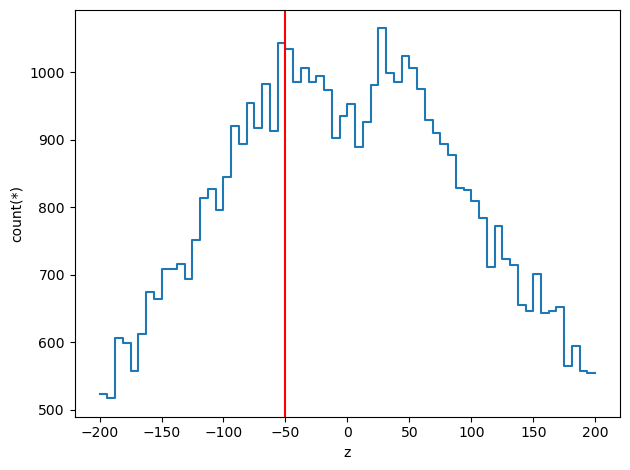

In [5]:
df.viz.histogram("z")
plt.axvline(-50, color="red")

In [6]:
from astroquery.utils.tap.core import TapPlus
# Vizier TAP service
tap = TapPlus(url="http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap")

def query_vizier(query, verbose=False):
    """Query Vizier TAP service."""
    job = tap.launch_job(query, verbose=verbose)
    return job.get_results()

query = """
SELECT TOP 10000 Source, plx, glon, glat, PMemb, Cluster
FROM "J/A+A/618/A93/members"
WHERE plx > 0 AND 1000/plx < 300 
"""

result = query_vizier(query)
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51497864767442176,7.0159,170.8774790187,-24.0139737241,0.2,Melotte_22
51558956382579200,7.2931,170.660227799,-24.6422053481,0.1,Melotte_22
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51717114258148864,7.1858,170.3945229144,-23.7775208459,0.2,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22


In [8]:
# group by cluster
df_clusters = result.to_pandas().groupby("Cluster")
# get cluster names
cluster_names = df_clusters.groups.keys()
cluster_names

dict_keys(['ASCC_123', 'ASCC_41', 'ASCC_99', 'Alessi_13', 'Alessi_3', 'Alessi_9', 'Blanco_1', 'Collinder_135', 'IC_2391', 'IC_2602', 'IC_348', 'Mamajek_1', 'Melotte_20', 'Melotte_22', 'NGC_1333', 'NGC_2232', 'NGC_2451A', 'NGC_2632', 'NGC_6475', 'NGC_7092', 'Platais_10', 'Platais_3', 'Platais_8', 'Platais_9', 'Ruprecht_147'])

In [9]:
# filter out members with PMemb < 0.5
result = result[result["PMemb"] > 0.5]
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22
51760270089541504,7.0455,170.2331075522,-23.8273629767,0.6,Melotte_22
51765595848971648,7.1487,170.3096287001,-23.7271393553,0.6,Melotte_22
53206780715340032,7.416,170.6041870361,-23.4478852618,0.7,Melotte_22


In [12]:
df_filtered = df[~df.source_id.isin(result["Source"])]
df_filtered

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False
1,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.12984776090651662,48.99197222546775,0.13610806369698816,2.4399851772656715,4.066397988698235,48.99197222546775,44.97401889181693,-18.594257078975943,1.2081950646993147e-08,2.6966985225558115e-08,6.001407660430157e-10,2.2320059081080115,44.93443330531096,True,False,False
2,3.8365084107078,-1.124264903059605,7.99,7.688,5850063632703452032,136.3025,-115.41101749515323,0.007777478,-72.5166878928762,0.013093553,9.26702172368321,0.013831709,8.920873,9.205091,8.46858,5.484650924968544,-0.06875462698467669,107.4739,107.3137,107.63,0.0004,1e-04,0.0012,F,--,-16.9925594329834,0.1674196422100067,gaia,5933.818359375,0.90869140625,1.35888671875,0.0,gspphot,4.207900047302246,0.0009002685546875,0.0008997917175292969,0.0,gspphot,-0.16369999945163727,0.0031000077724456787,0.003299996256828308,0.0,gspphot,0.10000000149011612,0.020000003278255463,0.009999997913837433,0.0,gspspec,-0.05000000074505806,0.08999999985098839

In [14]:
# Hyades

query = """
SELECT TOP 10000 Memb, HIP,plx	
FROM "J/A+A/331/81/table2"
"""

hyades = query_vizier(query)
hyades = hyades.to_pandas()
hyades = hyades[hyades["Memb"] == "1"]
hyades

,Memb,HIP,plx
1,1,10672,15.37
3,1,12709,53.89
5,1,13117,29.67
6,1,13600,18.89
8,1,13806,25.77
...,...,...,...
263,1,24923,18.26
265,1,25639,11.58
271,1,26382,18.56
278,1,28356,14.87


In [15]:
# crossmatch to gaia
from astroquery.gaia import Gaia
query_gaia = f"""
SELECT TOP 100000 gaia.source_id, ra, dec, parallax, original_ext_source_id AS hip
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.hipparcos2_best_neighbour AS hipparcos ON hipparcos.source_id = gaia.source_id
WHERE parallax > 0 AND 1000/parallax < 300
"""
job_gaia = Gaia.launch_job(query_gaia)
gaia = job_gaia.get_results()
gaia = gaia.to_pandas()
gaia

,source_id,ra,dec,parallax,hip
0,7632157690368,45.034343,0.235390,5.602294,13989
1,44358422235136,45.501454,0.497697,9.558267,14113
2,83154862613888,44.937316,0.623793,15.672104,13957
3,132667245587072,45.072796,0.969971,5.737754,14003
4,148953761446272,45.656686,0.848683,5.472354,14164
...,...,...,...,...,...
58057,6916866026425956352,313.813957,-1.972894,6.375869,103266
58058,6916948176264955392,313.784539,-1.372914,11.553046,103261
58059,6916960034670493440,313.725728,-1.375816,13.469747,103237
58060,6917116130961541120,315.873033,-1.579706,20.718128,103931


In [16]:
gaia_hyades = gaia[gaia.hip.isin(hyades["HIP"])]
gaia_hyades.reset_index(drop=True, inplace=True)
gaia_hyades

,source_id,ra,dec,parallax,hip
0,8479094371605632,45.013188,7.749849,42.078085,13976
1,10584899657116672,49.360689,7.655783,21.272281,15304
2,10608573516849536,49.387341,7.690126,21.226137,15310
3,11037726649058432,50.122663,8.454478,31.603160,15563
4,35442864696220032,43.818418,17.891653,18.768039,13600
...,...,...,...,...,...
137,3413146914553161728,71.859498,23.050739,18.236671,22253
138,3414082525931242368,77.698249,20.569059,12.200862,24116
139,3422091372924795776,77.438184,28.030211,15.342843,24019
140,3431617850909731200,90.154208,29.005057,10.992923,28469


In [17]:
df_filtered_2 = df_filtered[~df_filtered.source_id.isin(gaia_hyades["source_id"])].extract()
df_filtered_2

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False
1,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.12984776090651662,48.99197222546775,0.13610806369698816,2.4399851772656715,4.066397988698235,48.99197222546775,44.97401889181693,-18.594257078975943,1.2081950646993147e-08,2.6966985225558115e-08,6.001407660430157e-10,2.2320059081080115,44.93443330531096,True,False,False
2,3.8365084107078,-1.124264903059605,7.99,7.688,5850063632703452032,136.3025,-115.41101749515323,0.007777478,-72.5166878928762,0.013093553,9.26702172368321,0.013831709,8.920873,9.205091,8.46858,5.484650924968544,-0.06875462698467669,107.4739,107.3137,107.63,0.0004,1e-04,0.0012,F,--,-16.9925594329834,0.1674196422100067,gaia,5933.818359375,0.90869140625,1.35888671875,0.0,gspphot,4.207900047302246,0.0009002685546875,0.0008997917175292969,0.0,gspphot,-0.16369999945163727,0.0031000077724456787,0.003299996256828308,0.0,gspphot,0.10000000149011612,0.020000003278255463,0.009999997913837433,0.0,gspspec,-0.05000000074505806,0.08999999985098839

In [24]:
df_hyades = df_filtered_2.filter("ra <73*3.14/180").filter("ra > 63*3.14/180").filter("dec < 20*3.14/180").filter("dec >15*3.14/180")
# df_hyades.viz.histogram("Dist")
df_hyades = df_hyades.extract()
df_hyades

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,1.118239834495503,0.2842362934652373,8.982,8.654,3312349254794744960,46.67574,20.292681339015907,0.02014193,-42.03369949510716,0.015692608,7.521098398947841,0.016389403,9.976234,10.279931,9.509149,3.105606971805433,-0.4194940683831936,132.3698,132.0655,132.659,0.0237,0.0143,0.0347,F,--,10.608575820922852,0.6329989433288574,gaia,5851.2080078125,18.376953125,20.955078125,0.0,gspphot,4.339200019836426,0.002399921417236328,0.0034999847412109375,0.0,gspphot,-0.3046000003814697,0.018700003623962402,0.021400004625320435,0.0,gspphot,0.4699999988079071,0.09999999403953552,0.1300000250339508,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.32800007,3.3634067040214557,132.9593028778741,-54.154116689369225,121.43108278922841,45.12633997924613,-11.926367814607595,0.017711869672272038,0.018391436908344265,-7.516320149347915,28.439842182034194,-0.020065332631245034,0.06297118222060685,-11.185474916381935,0.25846994411197144,6.62737507847209,0.578172610748561,-5.599878177298855,0.5778027349418401,-28.65986894891839,0.06627923584198578,2.241931681680207,3.9061128282360063,-28.65986894891839,-5.599878177298855,-3.935474916381935,3.522118540583945e-06,3.671817780512445e-07,2.8212039195928433e-09,0.10425026126189611,130.1507400798721,True,False,False
1,1.1202961465136176,0.33421536739242175,9.415,9.039,48566807285083904,82.97763,33.693923813178685,0.018679185,-75.82879881853233,0.013704804,7.467148006549617,0.018379452,10.558664,10.934993,10.01797,3.0660158346634807,-0.3852233276384054,133.0726,132.6883,133.663,0.0559,0.0456,0.0746,G,F9,-6.777911186218262,0.2043991982936859,gaia,5491.0,19.41796875,34.14794921875,0.0,gspphot,4.389699935913086,0.011099815368652344,0.01620006561279297,0.0,gspphot,0.23000000417232513,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.009999999776482582,0.019999999552965164,0.029999999329447746,0.0,gspspec,-0.11999999731779099,0.1600000038743019,0.1599999964237213,0.0,gspspec,-0.11999999731779099,0.02800000086426735,0.02800000086426735,1.0,lamost,0.3760004,3.7807737597362685,133.91993825793674,-50.322573860312396,124.10555355455689,79.15057644457352,-24.9093051023401,0.0160731618916912,0.016684935106085787,-15.811941330415564,50.24324307194721,-0.0403345107232065,0.12408763640325045,-12.106246585729815,0.0854187590204754,-12.222780464782623,0.1900251052513429,15.981500348701452,0.18971416102186614,-49.176940564470854,0.12456251138162988,2.7066564403374302,4.188081851205064,-49.176940564470854,15.981500348701452,-4.856246585729815,6.077801804906363e-07,1.4253683996200727e-07,1.5000250444763233e-09,0.234520381771816,95.0229734409325,True,False,False
2,1.122415360197974,0.3044084598939374,8.834,8.495,47363357448413184,33.02048,-25.769187565336896,0.02197856,-20.647063494684033,0.019298594,8.555591783286433,0.021599112,9.786581,10.080939,9.327484,3.0917600451471747,-0.4033128766772804,116.312,115.9933,116.627,0.0036,0.0008,0.0128,G,G2,30.415313720703125,0.46237877011299133,gaia,5877.50732421875,5.4375,18.51123046875,0.0,gspphot,4.3856000900268555,0.002300262451171875,0.003299713134765625,0.0,gspphot,-0.17219999432563782,0.009300008416175842,0.015999987721443176,0.0,gspphot,0.05000000074505806,0.020000001415610313,0.04000000283122063,0.0,gspspec,-0.0500000007450580

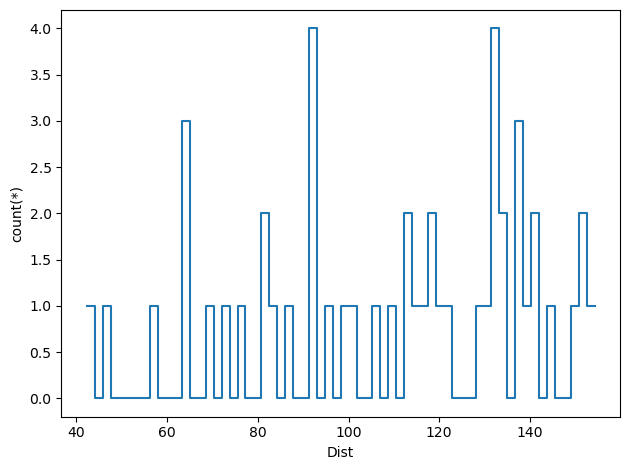

In [26]:
df_hyades.viz.histogram("Dist")

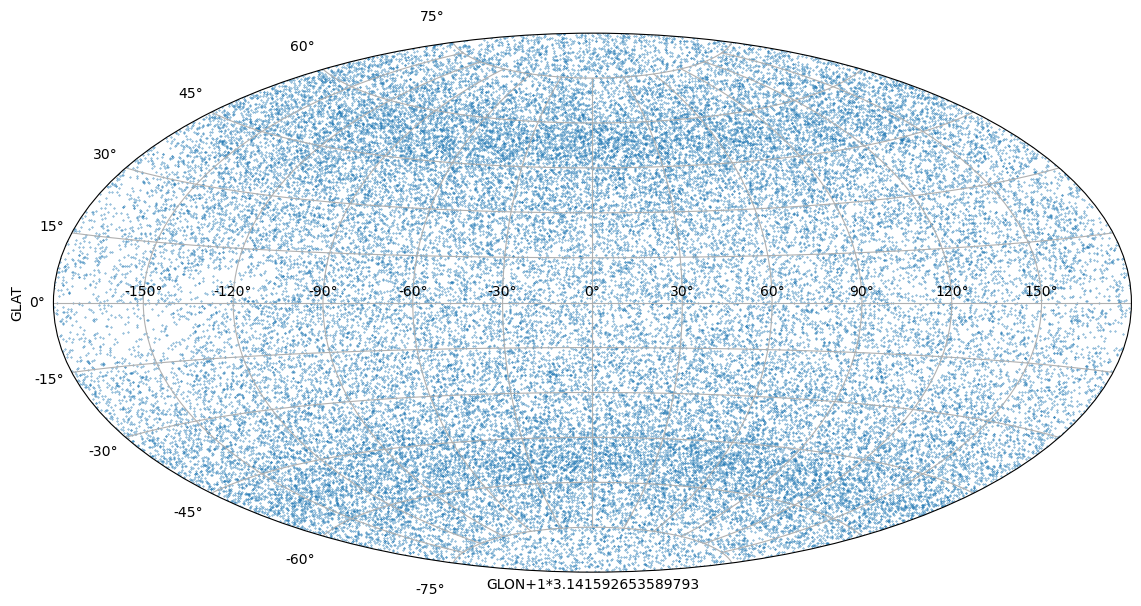

In [27]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_filtered_2.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1, c="C0")
df_filtered_2.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

(-150.0, 150.0)

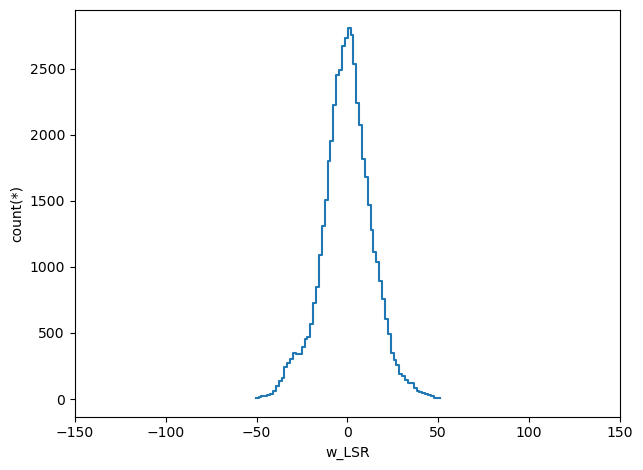

In [28]:
df_filtered_2.viz.histogram("w_LSR")
plt.xlim(-150, 150)

In [29]:
df_filtered_2.export(join(data_dir, "thin-AG-extended-filtered.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.87s =  0.0m =  0.0h            
 

Trying to figure out the "bump" from -30 to -40 km/s in w_LSR

In [29]:
df_filtered_2["theta"] = df_filtered_2.evaluate("arctan2(w_LSR, (v_LSR**2+u_LSR**2)**(1/2))")
df_filtered_2["phi"] = df_filtered_2.evaluate("arctan2(u_LSR, v_LSR)")
df_filtered_2

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo,theta,phi
0,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False,-0.4198182658348584,-0.1393386512052202
1,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.12984776090651662,48.99197222546775,0.13610806369698816,2.4399851772656715,4.066397988698235,48.99197222546775,44.97401889181693,-18.594257078975943,1.2081950646993147e-08,2.6966985225558115e-08,6.001407660430157e-10,2.2320059081080115,44.93443330531096,True,False,False,-0.27263135320419396,0.8281317862343991
2,3.8365084107078,-1.124264903059605,7.99,7.688,5850063632703452032,136.3025,-115.41101749515323,0.007777478,-72.5166878928762,0.013093553,9.26702172368321,0.013831709,8.920873,9.205091,8.46858,5.484650924968544,-0.06875462698467669,107.4739,107.3137,107.63,0.0004,1e-04,0.0012,F,--,-16.9925594329834,0.1674196422100067,gaia,5933.818359375,0.90869140625,1.35888671875,0.0,gspphot,4.207900047302246,0.0009002685546875,0.0008997917175292969,0.0,gspphot,-0.16369999945163727,0.0031000077724456787,0.003299996256828308,0.0,gspphot,0.10000000149011612,0.02

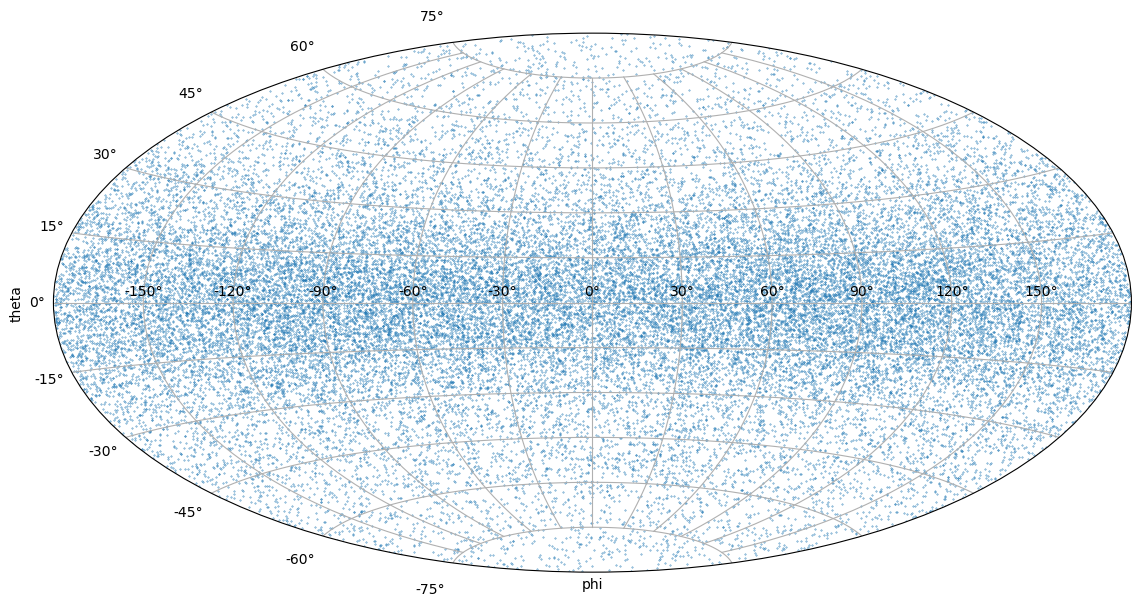

In [34]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
df_filtered_2.filter("Dist >100").viz.scatter(f"phi", "theta", length_check=False, s=0.1, alpha=1, c="C0")
# df_filtered_2.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

In [66]:
# 

In [173]:
mid = -7.25
df_low = df_filtered_2.filter(f"(w < {mid})")
df_high = df_filtered_2.filter(f"(w > {mid})")

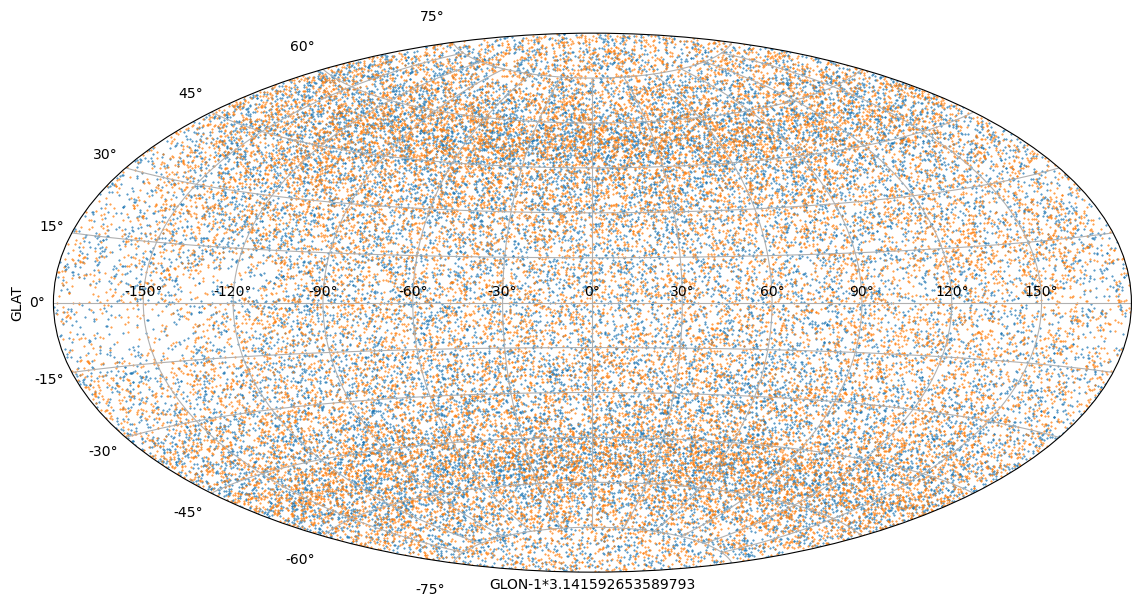

In [182]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_low.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.2, alpha=1)
df_high.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.2, alpha=1)
# df_low.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.5, alpha=1,c="C0")
plt.grid(True)
plt.show()

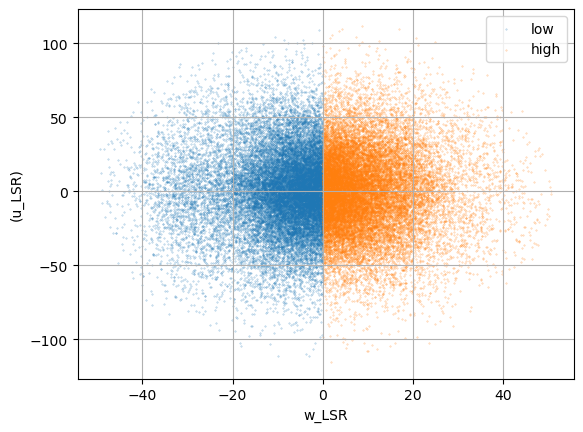

In [183]:
df_low.viz.scatter("w_LSR", "(u_LSR)", s=0.1, alpha=0.5, label="low")
df_high.viz.scatter("w_LSR", "(u_LSR)", s=0.1, alpha=0.5, label="high")
plt.legend()
plt.grid()

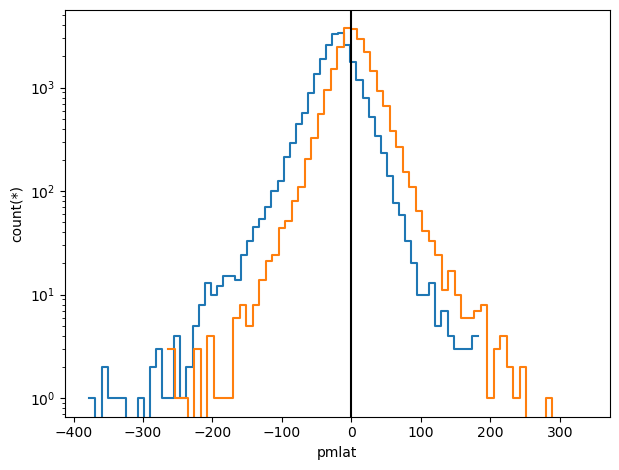

In [201]:
df_low.viz.histogram("pmlat")
df_high.viz.histogram("pmlat")
plt.yscale("log")
plt.axvline(0, c="k")